# Problem Set 3

## 1) AR(1) process

An AR(1) process with one parameter $a$ is given by

$$ x(t) = a x(t - 1) + w(t) $$

Here, $w(t)$ is a white noise process with variance $\sigma_w^2$.


### (1a) Autocorrelation of an AR(1) process

$$
R_{xx}(\tau) = E[x(t) x(t + \tau)]
$$

For a stationary random process, $R_{xx}(\tau) = R_{xx}(-\tau)$. Given this symmetry, we can focus our attention on calculating $R_{xx}(\tau)$ for positive $\tau$.

Substituting the basic form of the AR(1) process in the equation above and working through some algebra, we get

$$
\begin{aligned}
R_{xx}(\tau) & = &  E[x(t) (ax(t + \tau - 1) + w(t + \tau))] \\
& = & E[ax(t)x(t + \tau - 1) + x(t)w(t + \tau)] \\
& = & aE[x(t)x(t + \tau - 1)] + E[x(t)w(t + \tau)]\\
\end{aligned}
$$

The first term multiplying $a$ can be recognized as $R_{xx}(\tau - 1)$. The second term is zero because $w(t + \tau)$ is a "future" sample of white noise compared to $x(t)$, and so the two are uncorrelated. This gives:

$$ R_{xx}(\tau) = aR_{xx}(\tau - 1) $$

Extending this recursion, we get:
$$
\begin{aligned}
R_{xx}(\tau) &=& aR_{xx}(\tau - 1)\\
&=& a^2R_{xx}(\tau - 2)\\
&=& a^3R_{xx}(\tau - 3)\\
&=& \ldots \\
&=& a^\tau R_{xx}(\tau - \tau)\\
&=& a^\tau R_{xx}(0)\\
&=& a^\tau V[x(t)] = a^\tau \sigma_x^2\\
\end{aligned}
$$
where $V[x(t)]$ is the variance of $x(t)$, which is a constant across time $t$, given stationarity.

To calculate what $V[x(t)] = \sigma_x^2$ is, let's go back to the basic form of the AR(1) process, i.e., $x(t) = a x(t - 1) + w(t)$, which gives 
$$
V[x(t)] = V[a x(t - 1)] + V[w(t)]
$$

$$
\Rightarrow \sigma_x^2= a^2\sigma_x^2 + \sigma_w^2
$$
(Remember that $V[ax]$ for any random variable $x$ and constant $a$ is $a^2V[x]$)

Rearranging, we get:
$$ \sigma_x^2 = \frac{\sigma_w^2}{1 - a^2} $$

Putting it all together, we get the following expression for the autocorrelation function of an AR(1) process for positive $\tau$:
$$
R_{xx}(\tau) = \frac{\sigma_w^2}{1 - a^2} a^\tau
$$

Then, by symmetry, for all positive and negative $\tau$, we get
$$
R_{xx}(\tau) = \frac{\sigma_w^2}{1 - a^2} a^{|\tau|}
$$


### (1b) Simulating an AR(1) process

(1000.0, 2000.0)

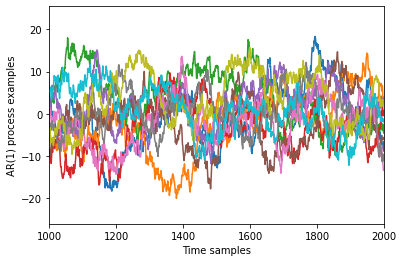

In [ ]:
import numpy as np
import pylab as pl

Nsamps = 2000
Nexamples = 10
sigma_w = 1  # Standard deviation is also 1 when variance is 1
a = 0.99  # The parameter of the AR(1) process

w = np.random.randn(Nexamples, Nsamps)

# Allocating space for x
x = np.zeros((Nexamples, Nsamps))

# Set first sample of all x examples to the first sample of w
x[:, 0] = w[:, 0]

# Start from second sample (index 1)
for t in range(1, Nsamps):
  x[:, t] = a*x[:, t-1] + w[:, t]


pl.plot(x.T)
pl.xlabel('Time samples')
pl.ylabel('AR(1) process examples')
pl.xlim((1000, Nsamps))  # Discarding first 1000 samples to allow IIR filter to settle


### (1c) Calculating across sample (i.e., across-time) variance

In [ ]:
var_x = np.var(x, axis=1)
print(var_x)

[61.5336797  45.17886623 62.23920029 46.48183783 38.60066916 41.88049199
 32.02265665 41.18110559 60.01791666 27.24688271]


Expected variance for $a=0.99$ and $\sigma_w^2 = 1$ is:
 $$ \frac{1}{1 - 0.99^2} $$

In [ ]:
var_expected = sigma_w**2 / (1 - a**2)
print(var_expected)

50.25125628140696


The calculated variance values from each of the 10 examples seem to fall on either side of the expected variance.

### (1d) Function to generate unit variance examples of AR(1) process

In [ ]:
def ar1(a, Nsamps, Nexamples):
  sigma_w = 1
  w = np.random.randn(Nexamples, Nsamps)

  # Allocating space for x
  x = np.zeros((Nexamples, Nsamps))

  # Set first sample of all x examples to the first sample of w
  x[:, 0] = w[:, 0]
  # Start from second sample (index 1)
  for t in range(1, Nsamps):
    x[:, t] = a*x[:, t-1] + w[:, t]
  
  # Dividing by expected standard deviation so that the variance becomes 1
  var_expected = sigma_w**2 / (1 - a**2)

  x /= (var_expected**0.5)
  return x

### (1e) Generating examples for $a=0.999$

(1000.0, 2000.0)

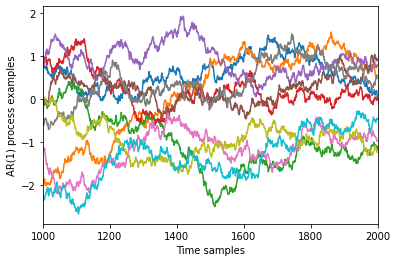

In [ ]:
Nsamps = 2000
Nexamples = 10
a = 0.999

x = ar1(a, Nsamps, Nexamples)

pl.plot(x.T)
pl.xlabel('Time samples')
pl.ylabel('AR(1) process examples')
pl.xlim((1000, Nsamps))  # Discarding first 1000 samples to allow IIR filter to settle


For $a=0.999$, the random process seems smoother than for $a=0.99$.

This makes sense because $R_{xx}(\tau)$ decays with $\tau$ as $a^{|\tau|}$. The closer $a$ is to $1$, the slower the decay and the correlations extend to farther pairs of samples.

### (1f) Using AR(1) model to statistically test whether a peak value of 4 is a significant anomaly

In [ ]:
Nexamples = 1000
Nsamps = 2000
a = 0.99
x = ar1(a, Nsamps, Nexamples)

threshold = 4
# Calculate the number of examples for which the peak value exceeds the given threshold
Nanomalies = (x.max(axis=1) > threshold).sum()

p_val = Nanomalies / Nexamples

print(f'The P-value for a peak of 4 is approximately {p_val}')

The P-value for a peak of 4 is approximately 0.005


Under conventional false-alarm-rate criteria, this would be considered a statistically significant anomaly (i.e., reject the hypothesis that baby is deaf)

## 2) Modeling guesswork for a multiple choice assignment

Here, the null hypothesis $\mathcal{H}_0$ is that the student is just guessing from one of three options.


### (2a) Average correct

If $I(k)$ is the the random variable indicating whether the student got the $k^{th}$ question correct (i.e., takes value of $1$ with probability $1/3$ and zero with probability $2/3$), and $x$ is the random variable denoting the number of questions correct, then
$$ x = \sum_{k=1}^{50} I(k) $$

The average value of $x$ is therefore
$$ E[x] = \sum_{k=1}^{50} E(I(k))  = \sum_{k=1}^{50} 1\times(1/3) + 0\times(2/3) = 50/3 = 16.66\dots $$

### (2b) P-value for a given number of questions correct

In standard literature on probability, the variable $I(k)$ is called a Bernoulli random variable, or a Bernoulli trial. If you have $50$ questions/trials total, you can get exactly $x=n$ trials correct in many different ways. That is, you can choose some particular subset of $n$ questions out of $50$ to get correct, and get the rest wrong. The number of ways of choosing $n$ questions out of $50$ is:

$$ {50 \choose n}  = \frac{50!}{n! (50 - n)!}$$

To get exactly $x$ correct, you get each question in this subset of $n$ correct, and the remaining wrong. So the probability of having exactly $x=n$ correct is
$$ P(x=n) =   {50 \choose n} (1/3)^n(2/3)^{50-n} $$

Because of the similarity of this expression to the coefficients of binomial expansions, this random variable $x$ is called a binomial random variable.

So the p-value if one were to get $x=n$ questions right is
$$P(x \geq n) = \sum_{k=n}^{50} {50 \choose k} (1/3)^k(2/3)^{50-k}$$

This is 1 - (the cumulative distribution function or CDF) of the binomial random variable. The inverse of the CDF, i.e., for what $x=n$ do you get a given CDF, is called the percent-point function (PPF). These functions can be calculated using the standard ```stats``` module in ```scipy``` (or by hand).

In case you haven't seen the binomial distribution in  earlier classes, a quick refresher can be found here: https://www.itl.nist.gov/div898/handbook/eda/section3/eda366i.htm

#### **Alternate method**
As discussed in class, if have lots of examples data from $\mathcal{H}_0$, then instead of analytically calculating p-values, we can simple ask "In what proportion of $\mathcal{H}_0$ examples do we get $x=n$ or more questions correct?"

Both methods are used below. However, note that to quantization of p-values we get from the "examples" approach will depend on how many examples we generate. When the p-values get tiny and we still want to estimate them accurately, the number of examples needed might become prohibitively high!

In [ ]:
# Analytic method
from scipy import stats

# Calculate for what x=n you get p=0.05
p_val_threshold = 0.05
p_binom = 1/3
Nquestions = 50
x_for_pval = stats.binom.ppf(1 - p_val_threshold, Nquestions, p_binom)
print(f'To get a p-value of {p_val_threshold} or less, the student will need to get {x_for_pval} or more questions correct!')


To get a p-value of 0.05 or less, the student will need to get 22.0 or more questions correct!


In [ ]:
x_for_pval

22.0

In [ ]:
# Examples from H0 method
p_val_threshold = 0.05

Nexamples_H0 = 1000  # We get a p-value resolution of 1/Nexamples_H0
N_correct_questions = np.zeros(Nexamples_H0)  # Making space to score number correct
N_questions = 50

for k in range(Nexamples_H0):
  # Draw uniform random variables between 0 and 1
  temp = np.random.rand(N_questions)
  N_correct_questions[k] = (temp < 1/3).sum()

# Let's sort the examples by number of questions correct and see what the top 5% of scores are (because we are interested in p=0.05)
N_correct_questions.sort()  # Sorts it into the same variable
x_for_pval = N_correct_questions[ np.int(np.round((1 - p_val_threshold) * Nexamples_H0)) ]
print(f'To get a p-value of {p_val_threshold} or less, the student will need to get {x_for_pval} or more questions correct!')


To get a p-value of 0.05 or less, the student will need to get 22.0 or more questions correct!


### (2c) Points based on p-values

According to the problem description, P-value of 0.5 or higher gets zero points, 0.05 gets 1, 0.005 gets 2 and so on. That is, every factor of 10 reduction in P-value is worth an extra point. So to get 15 total points, you need P-value of $0.5 \times 10^{-15}$, which is $5\times10^{-16}$.

This is too small a number to try and generate examples (we will need many more than $10^{16}$ examples). One way to understand this is to see that if a student were merely guessing, them getting full points would be an extremely rare event, and so we won't observe that event unless we do a very large number of examples. So we'll stick to the analytical method here and use the same code as the previous part.

In [ ]:
# Calculate for what x=n you get p=0.05
p_val_threshold = 5e-16
p_binom = 1/3
Nquestions = 50
x_for_pval = stats.binom.ppf(1 - p_val_threshold, Nquestions, p_binom)
print(f'To get full 15 points, the student will need to get {x_for_pval} or more questions correct!')

To get full 15 points, the student will need to get 44.0 or more questions correct!


## 3) Understanding false-alarm rates, hit rates, etc.

### (3a) What does it mean when you get a positive test? What's the probability you actually have the disease?

Here, the prevalence is given to be 50%. That is the probability of a random individual having the disease (let's call this D) is 50%:

$$ P(D) = 0.5 $$

The test has 90% specificy (10% false-alarm rate), so if a random individual who didn't have the disease (let's call this NoD) takes the test, they would test postive with probability of 10%. That is:

$$ P(+ | NoD) = 0.1 $$

The sensitivity is given to be 90% (miss rate of 10%), so if a random individual who did in fact have the disease takes the test, they would test postive with probability of 90%. That is:

$$ P(+ | D) = 0.9 $$

The question is asking what's the probability of actually having the disease if one were to test positive. That is, what is $P(D|+)$.

This can be answered using basic conditional probability rules. In particular, we will use Bayes' theorem.

$$ 
\begin{align}
P(D|+) &=& \frac{P(+|D)P(D)}{P(+)}\\
&=&\frac{P(+|D)P(D)}{P(+|D)P(D) + P(+|NoD)P(NoD)}\\
&=& \frac{0.9 \times 0.5}{0.9 \times 0.5 + 0.1 \times 0.5}\\
&=& 0.9\\ 
\end{align}
$$

Thus if someone tests positive, there is a 90% chance they actually have the disease.

### (3b) Verification  by simulation

In [ ]:
# Simulate disease and testing scenario

N_people = 10000

# Split people into D and NoD groups in proportion with the prevalence
prevalence = 0.5
N_D = np.int(np.round(N_people * prevalence))
N_NoD = np.int(np.round(N_people * (1 - prevalence)))

# Give each person in the D group a test
# Let's denote negative test as 0 and positive as 1
sensitivity = 0.9
result_Dgroup = np.zeros(N_D)   # Start with all zeros
result_Dgroup[:np.int(np.round(sensitivity * N_D))] = 1  # Make the appropriate proportion 1

# Give each person in the NoD group a test
# Let's denote negative test as 0 and positive as 1
false_alarm = 0.1
result_NoDgroup = np.zeros(N_NoD)   # Start with all zeros
result_NoDgroup[:np.int(np.round(false_alarm * N_NoD))] = 1  # Make the appropriate proportion 1

# Now count up everyone who tested positive
N_pos = result_Dgroup.sum() + result_NoDgroup.sum()

# Among the positive tested, count up how many have disease
N_pos_D = result_Dgroup.sum()

# Probability of having actually having disease when testing positive
P_D_given_pos = N_pos_D / N_pos

print(f'Probability of actually having disease after testing positive is {P_D_given_pos}')


Probability of actually having disease after testing positive is 0.9


### (3c) Repeating calculations when prevalence is 1%

Here, the disease is more rare. That is:
$$ P(D) = 0.01 $$

Therefore, a random individual has a higher probability of **not** having the disease. That is:
$$ P(NoD) = 0.99 $$

If sensitivity and specificy are the same, then the question is asking what's the probability of actually having the disease if one were to test positive. That is, what is $P(D|+)$.

$$ 
\begin{align}
P(D|+) &=& \frac{P(+|D)P(D)}{P(+)}\\
&=&\frac{P(+|D)P(D)}{P(+|D)P(D) + P(+|NoD)P(NoD)}\\
&=& \frac{0.9 \times 0.01}{0.9 \times 0.01 + 0.1 \times 0.99}\\
&=& 0.08333\ldots\\ 
\end{align}
$$

Interestingly, if someone tests positive, even after that, their chance of having the disease is low-ish, i.e., 8.33%

This can be understood by thinking about the prevalence and test result as two pieces of evidence. Here, the prevalence dictates that the chance is low, but then testing positive increases the chance. However, the net is still a low probability of having the disease because the prevalence is much closer to zero than the false-alarm rate of the test is.

The same code as (3b) can be used to re-calculate the required probabilities, and as can be seen below, agreement is found.

In [ ]:
# Simulate disease and testing scenario for 1% prevalence

N_people = 10000

# Split people into D and NoD groups in proportion with the prevalence
prevalence = 0.01
N_D = np.int(np.round(N_people * prevalence))
N_NoD = np.int(np.round(N_people * (1 - prevalence)))

# Give each person in the D group a test
# Let's denote negative test as 0 and positive as 1
sensitivity = 0.9
result_Dgroup = np.zeros(N_D)   # Start with all zeros
result_Dgroup[:np.int(np.round(sensitivity * N_D))] = 1  # Make the appropriate proportion 1

# Give each person in the NoD group a test
# Let's denote negative test as 0 and positive as 1
false_alarm = 0.1
result_NoDgroup = np.zeros(N_NoD)   # Start with all zeros
result_NoDgroup[:np.int(np.round(false_alarm * N_NoD))] = 1  # Make the appropriate proportion 1

# Now count up everyone who tested positive
N_pos = result_Dgroup.sum() + result_NoDgroup.sum()

# Among the positive tested, count up how many have disease
N_pos_D = result_Dgroup.sum()

# Probability of having actually having disease when testing positive
P_D_given_pos = N_pos_D / N_pos

print(f'Probability of actually having disease after testing positive is {P_D_given_pos}')


Probability of actually having disease after testing positive is 0.08333333333333333


### (3d) Repeat testing

Here, the prevalence is still 1%, but the test is done two or three times

#### **Two independent repeats**
Let's denote testing positive twice as ++. So if one did have the disease,

$$ P(++|D) = P(+|D) \times P(+|D) = 0.9 \times 0.9 = 0.81 $$

Similarly, when someone doesn't have the disease
$$ P(++|NoD) = P(+|NoD) \times P(+|NoD) = 0.1 \times 0.1 = 0.01 $$

The question is again asking what's the probability of actually having the disease if one were to test positive twice. That is, what is $P(D|++)$.

This can again be answered using Bayes' theorem.

$$ 
\begin{align}
P(D|++) &=& \frac{P(++|D)P(D)}{P(++)}\\
&=&\frac{P(++|D)P(D)}{P(++|D)P(D) + P(++|NoD)P(NoD)}\\
&=& \frac{0.81 \times 0.01}{0.81 \times 0.01 + 0.01 \times 0.99}\\
&=& 0.45\\ 
\end{align}
$$

Thus, we can see that testing positive twice (when tests are independent) does mean that your chance of having the disease is higher (45%) than if you took only one test and test positive (8.33%). However it is  close to 50-50 because the false alarm rate is now comparable to the prevalence.

#### **Three independent repeats**
Let's denote testing positive thrice as +++. So if one did have the disease,

$$ P(+++|D) = P(+|D)^3 = 0.9^3 = 0.729 $$

Similarly, when someone doesn't have the disease
$$ P(+++|NoD) = P(+|NoD)^3 = 0.1^3 = 0.001 $$

The question is again asking what's the probability of actually having the disease if one were to test positive thrice. That is, what is $P(D|+++)$.

This can again be answered using Bayes' theorem.

$$ 
\begin{align}
P(D|+++) &=& \frac{P(+++|D)P(D)}{P(+++)}\\
&=&\frac{P(+++|D)P(D)}{P(+++|D)P(D) + P(+++|NoD)P(NoD)}\\
&=& \frac{0.729 \times 0.01}{0.729 \times 0.01 + 0.001 \times 0.99}\\
&=& 0.88\\ 
\end{align}
$$

Thus, we can see that testing positive three times means that your chance of having the disease is even higher (88%). Now the odds have shifted more clearly to the high likelihood of having the disease despite it being rare (1% prevalence) because the false alarm rate of the triple-test is quite low (0.1%).


